In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel( "Deep-surface - Copy (2).xlsx")

In [4]:
df.dropna(subset=['Timestamp', 'Surface_temperature_S323', 'Air_temperature_S323',
       'Humidity_S323', 'Dew_point_S323', 'Wind_max_S323', 'Mean_wind_30min',
       'Friction_S323', 'Water_layer_S323', 'Surface_temperature_S316',
       'Air_temperature_S316', 'Humidity__S316', 'Dew_point__S316',
       'Wind_max_S316', 'Mean_wind_30min_S316', 'Friction_S316',
       'Water_layer_S316', 'Surface_temperature_S321'],inplace=True)

In [5]:
df = df.drop('Timestamp',axis=1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Surface_temperature_S321',axis=1).values
y = df['Surface_temperature_S321'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train = scaler.fit_transform(X_train)

In [12]:
X_test = scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
from tensorflow.keras.layers import Dense

In [15]:
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))


model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=24,epochs=200)

Train on 4639 samples, validate on 1989 samples
Epoch 1/200
4639/4639 [==============================] - 1s 126us/sample - loss: 19.8816 - val_loss: 2.8686
Epoch 2/200
4639/4639 [==============================] - 0s 72us/sample - loss: 1.9406 - val_loss: 1.2450
Epoch 3/200
4639/4639 [==============================] - 0s 67us/sample - loss: 1.2657 - val_loss: 1.0736
Epoch 4/200
4639/4639 [==============================] - 0s 74us/sample - loss: 1.1260 - val_loss: 1.0364
Epoch 5/200
4639/4639 [==============================] - 0s 70us/sample - loss: 1.0299 - val_loss: 0.8545
Epoch 6/200
4639/4639 [==============================] - 0s 65us/sample - loss: 0.9569 - val_loss: 0.7877
Epoch 7/200
4639/4639 [==============================] - 0s 80us/sample - loss: 0.9005 - val_loss: 0.7719
Epoch 8/200
4639/4639 [==============================] - 0s 95us/sample - loss: 0.8720 - val_loss: 0.7636
Epoch 9/200
4639/4639 [==============================] - 0s 92us/sample - loss: 0.8815 - val_loss: 0.7

4639/4639 [==============================] - 1s 155us/sample - loss: 0.6927 - val_loss: 0.5910
Epoch 77/200
4639/4639 [==============================] - 1s 174us/sample - loss: 0.6815 - val_loss: 0.6451
Epoch 78/200
4639/4639 [==============================] - 1s 157us/sample - loss: 0.6912 - val_loss: 0.6118
Epoch 79/200
4639/4639 [==============================] - 1s 124us/sample - loss: 0.6847 - val_loss: 0.6000
Epoch 80/200
4639/4639 [==============================] - 0s 96us/sample - loss: 0.6825 - val_loss: 0.5783
Epoch 81/200
4639/4639 [==============================] - 0s 80us/sample - loss: 0.6705 - val_loss: 0.6741
Epoch 82/200
4639/4639 [==============================] - 0s 106us/sample - loss: 0.6693 - val_loss: 0.5825
Epoch 83/200
4639/4639 [==============================] - 0s 81us/sample - loss: 0.6774 - val_loss: 0.6999
Epoch 84/200
4639/4639 [==============================] - 0s 87us/sample - loss: 0.6765 - val_loss: 0.5867
Epoch 85/200
4639/4639 [=====================

Epoch 152/200
4639/4639 [==============================] - 0s 70us/sample - loss: 0.6116 - val_loss: 0.8220
Epoch 153/200
4639/4639 [==============================] - 0s 66us/sample - loss: 0.6340 - val_loss: 0.5692
Epoch 154/200
4639/4639 [==============================] - 0s 90us/sample - loss: 0.6044 - val_loss: 0.5432
Epoch 155/200
4639/4639 [==============================] - 0s 74us/sample - loss: 0.5993 - val_loss: 0.5645
Epoch 156/200
4639/4639 [==============================] - 0s 69us/sample - loss: 0.5933 - val_loss: 0.5489
Epoch 157/200
4639/4639 [==============================] - 0s 64us/sample - loss: 0.6043 - val_loss: 0.5436
Epoch 158/200
4639/4639 [==============================] - 0s 65us/sample - loss: 0.5998 - val_loss: 0.6897
Epoch 159/200
4639/4639 [==============================] - 0s 65us/sample - loss: 0.6143 - val_loss: 0.5516
Epoch 160/200
4639/4639 [==============================] - 0s 65us/sample - loss: 0.5972 - val_loss: 0.5452
Epoch 161/200
4639/4639 [===

In [18]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

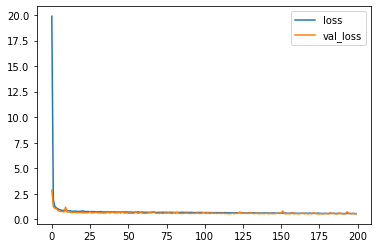

In [19]:
losses.plot()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [21]:
predictions = model.predict(X_test)

In [22]:
mean_squared_error(y_test,predictions)

0.5453330333457655

In [23]:
np.sqrt(mean_squared_error(y_test,predictions))

0.7384666772074184

In [24]:
mean_absolute_error(y_test,predictions)

0.5361793226875691

In [25]:
explained_variance_score(y_test,predictions)

0.9813255797891697

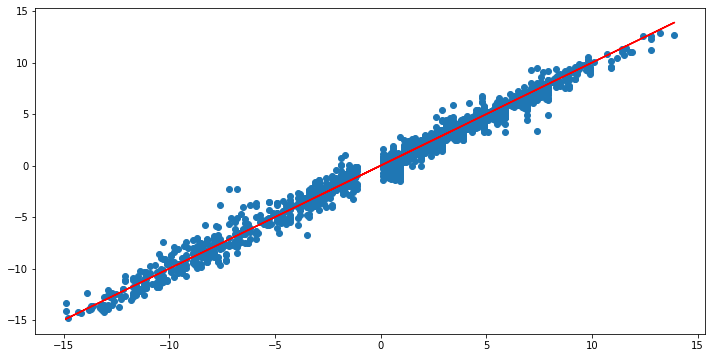

In [26]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')